In [ ]:
# Install necessary libraries if not present
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV files (change path if loading from Google Drive)
sentinel1_path = "/content/sentinel1_vegetation_NC.csv"  # Update path if needed
sentinel2_path = "/content/sentinel2_vegetation_NC.csv"  # Update path if needed

In [ ]:
# Read CSV files
sentinel1_df = pd.read_csv(sentinel1_path)
sentinel2_df = pd.read_csv(sentinel2_path)

In [ ]:
# Standardize column names
sentinel1_df.rename(columns={"date": "Date"}, inplace=True)
sentinel2_df.rename(columns={"date": "Date"}, inplace=True)

In [ ]:
# Convert 'Date' column to datetime format
sentinel1_df['Date'] = pd.to_datetime(sentinel1_df['Date'])
sentinel2_df['Date'] = pd.to_datetime(sentinel2_df['Date'])

DATA ANALYSIS

In [ ]:
# Sentinel-1 Analysis
print("Sentinel-1 Data Summary:\n", sentinel1_df.describe())
print("\nMissing values in Sentinel-1:\n", sentinel1_df.isnull().sum())

Sentinel-1 Data Summary:
                       Date         VV         VH        RVI  Soil_Moisture  \
count                   56  56.000000  56.000000  56.000000      56.000000   
mean   2023-06-21 00:00:00  -7.823577 -16.620246   2.728441       0.682110   
min    2023-01-10 00:00:00  -9.719864 -17.749667   2.570787       0.642697   
25%    2023-04-01 00:00:00  -9.172646 -16.946844   2.604180       0.651045   
50%    2023-06-21 00:00:00  -7.360837 -16.560448   2.748785       0.687196   
75%    2023-09-10 00:00:00  -6.849072 -16.380861   2.822314       0.705579   
max    2023-11-30 00:00:00  -4.345159 -15.271075   3.113967       0.778492   
std                    NaN   1.320384   0.516970   0.132112       0.033028   

       Surface_Reflectance  
count            56.000000  
mean              8.796669  
min               7.604346  
25%               7.838706  
50%               8.806612  
75%               9.596278  
max              10.925916  
std               0.993132  

Missing v

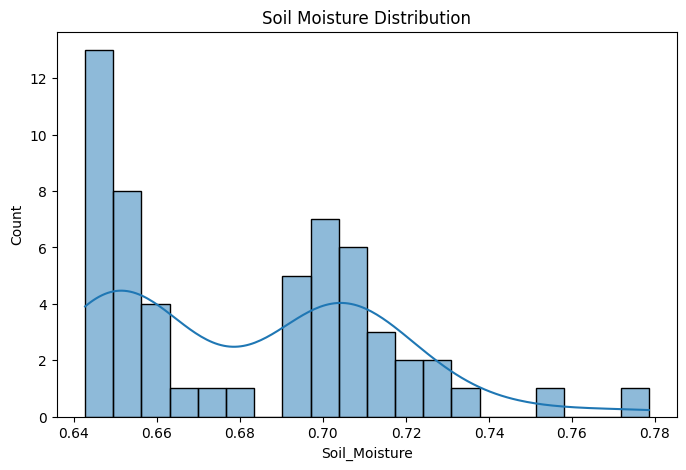

In [ ]:
# Plot soil moisture distribution
plt.figure(figsize=(8,5))
sns.histplot(sentinel1_df['Soil_Moisture'], bins=20, kde=True)
plt.title("Soil Moisture Distribution")
plt.show()

In [ ]:
# Sentinel-2 Analysis
print("Sentinel-2 Data Summary:\n", sentinel2_df.describe())
print("\nMissing values in Sentinel-2:\n", sentinel2_df.isnull().sum())

Sentinel-2 Data Summary:
                       Date            B2            B3            B4  \
count                   50     50.000000     50.000000     50.000000   
mean   2023-06-10 09:36:00   3165.400000   3263.520000   3294.640000   
min    2023-01-03 00:00:00   1409.000000   1770.000000   1594.000000   
25%    2023-03-10 06:00:00   1681.500000   1985.000000   2138.000000   
50%    2023-05-28 00:00:00   1826.000000   2136.000000   2368.000000   
75%    2023-09-07 12:00:00   2437.500000   2622.500000   2939.250000   
max    2023-12-29 00:00:00  17536.000000  15088.000000  13384.000000   
std                    NaN   3541.324916   3011.264893   2669.897825   

                 B5            B6            B7           B8           B8A  \
count     50.000000     50.000000     50.000000     50.00000     50.000000   
mean    3578.820000   4527.580000   4948.660000   4800.62000   5155.780000   
min     2111.000000   2641.000000   2849.000000   2520.00000   3011.000000   
25%     2381.

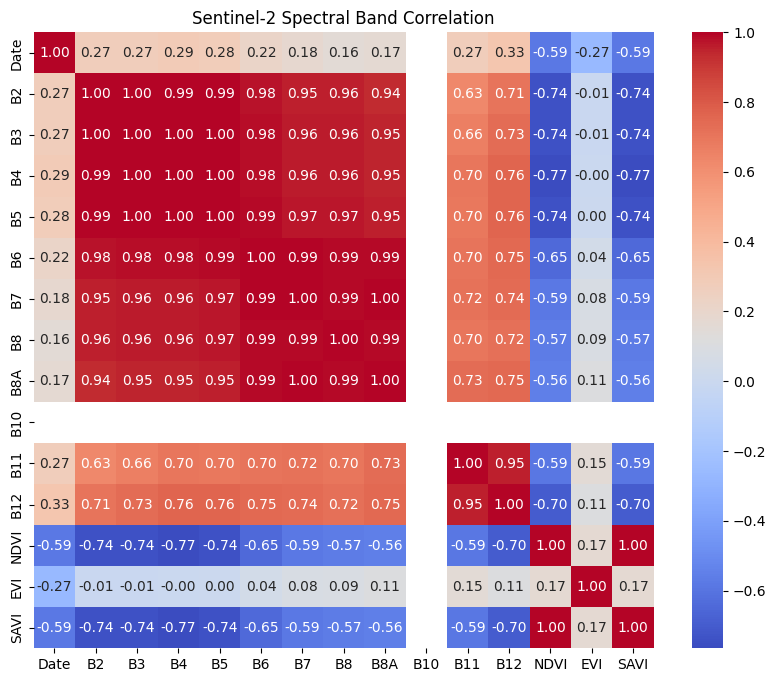

In [ ]:
# Correlation heatmap for Sentinel-2 bands
plt.figure(figsize=(10,8))
sns.heatmap(sentinel2_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sentinel-2 Spectral Band Correlation")
plt.show()

DATA FUSION

In [ ]:
# Merge the two datasets based on 'Date' (Inner join to keep common timestamps)
merged_df = pd.merge(sentinel1_df, sentinel2_df, on="Date", how="outer")

In [ ]:
# Drop column 'B10' as it contains only NaN values
if "B10" in merged_df.columns:
    merged_df.drop(columns=["B10"], inplace=True)

In [ ]:
# Check missing values after merging
print("\nMissing values in Merged Dataset:\n", merged_df.isnull().sum())


Missing values in Merged Dataset:
 Date                    0
VV                     46
VH                     46
RVI                    46
Soil_Moisture          46
Surface_Reflectance    46
B2                     48
B3                     48
B4                     48
B5                     48
B6                     48
B7                     48
B8                     48
B8A                    48
B11                    48
B12                    48
NDVI                   48
EVI                    48
SAVI                   48
dtype: int64


In [ ]:
# ✅ KNN Imputation (Choose k=5 nearest neighbors)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
merged_df.iloc[:, 1:] = knn_imputer.fit_transform(merged_df.iloc[:, 1:])  # Skip 'Date' column

# ✅ Save Cleaned Data
merged_df.to_csv("sentinel_merged.csv", index=False)

# ✅ Print number of missing values after filling
print("Missing values after filling:\n", merged_df.isnull().sum())


Missing values after filling:
 Date                   0
VV                     0
VH                     0
RVI                    0
Soil_Moisture          0
Surface_Reflectance    0
B2                     0
B3                     0
B4                     0
B5                     0
B6                     0
B7                     0
B8                     0
B8A                    0
B11                    0
B12                    0
NDVI                   0
EVI                    0
SAVI                   0
dtype: int64


In [ ]:
# Summary statistics of merged data
print("Merged Data Summary:\n", merged_df.describe())

Merged Data Summary:
                                 Date          VV          VH         RVI  \
count                            102  102.000000  102.000000  102.000000   
mean   2023-06-15 13:38:49.411764736   -7.935429  -16.706724    2.719118   
min              2023-01-03 00:00:00   -9.719864  -17.749667    2.570787   
25%              2023-03-20 00:00:00   -8.071597  -16.812002    2.674177   
50%              2023-06-09 12:00:00   -8.071597  -16.812002    2.707768   
75%              2023-09-09 06:00:00   -7.323113  -16.530005    2.784270   
max              2023-12-29 00:00:00   -4.345159  -15.271075    3.113967   
std                              NaN    0.982225    0.393358    0.098037   

       Soil_Moisture  Surface_Reflectance            B2            B3  \
count     102.000000           102.000000    102.000000    102.000000   
mean        0.679779             8.771295   3035.450980   3114.264706   
min         0.642697             7.604346   1409.000000   1770.000000   
2

In [ ]:
# Normalize all numerical columns except 'Date'
for col in merged_df.columns[1:]:  # Skipping 'Date' column
    merged_df[col] = (merged_df[col] - merged_df[col].min()) / (merged_df[col].max() - merged_df[col].min())

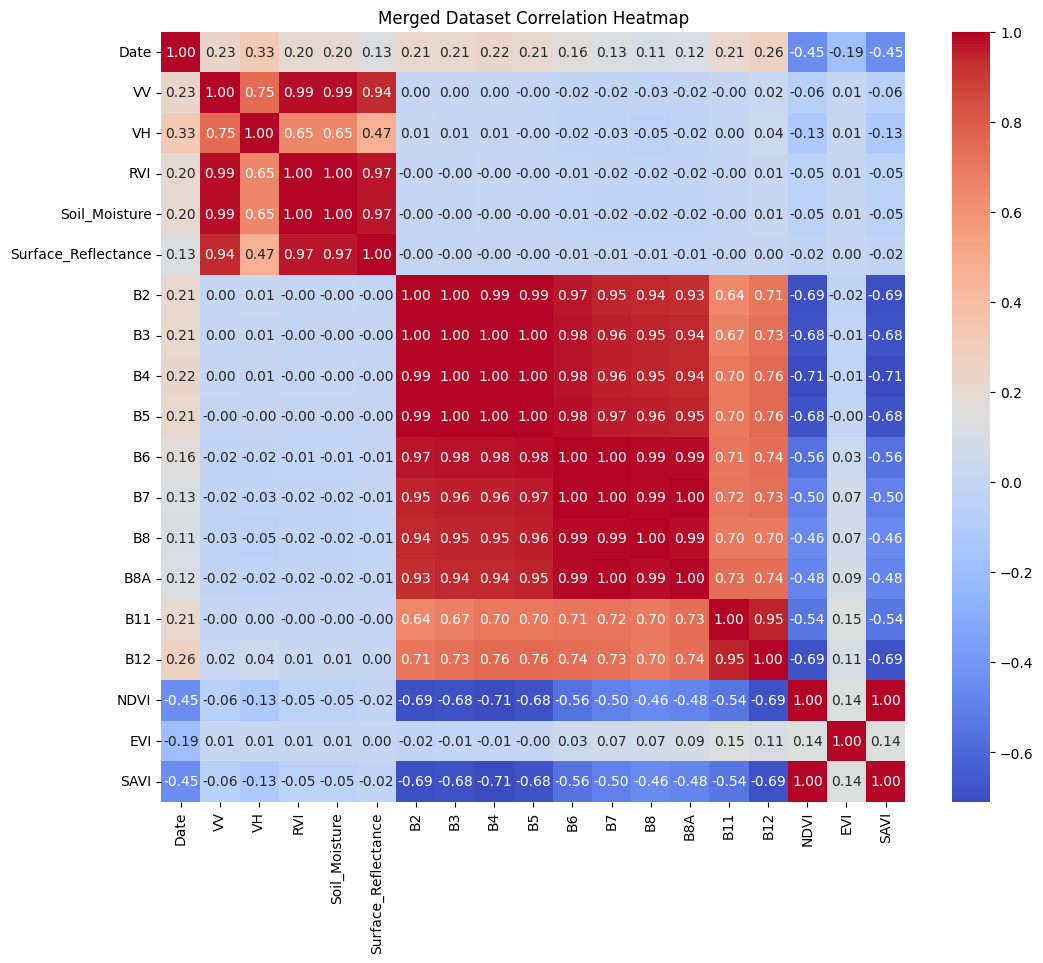

In [ ]:
# Visualization of correlations in merged dataset
plt.figure(figsize=(12,10))
sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Merged Dataset Correlation Heatmap")
plt.show()

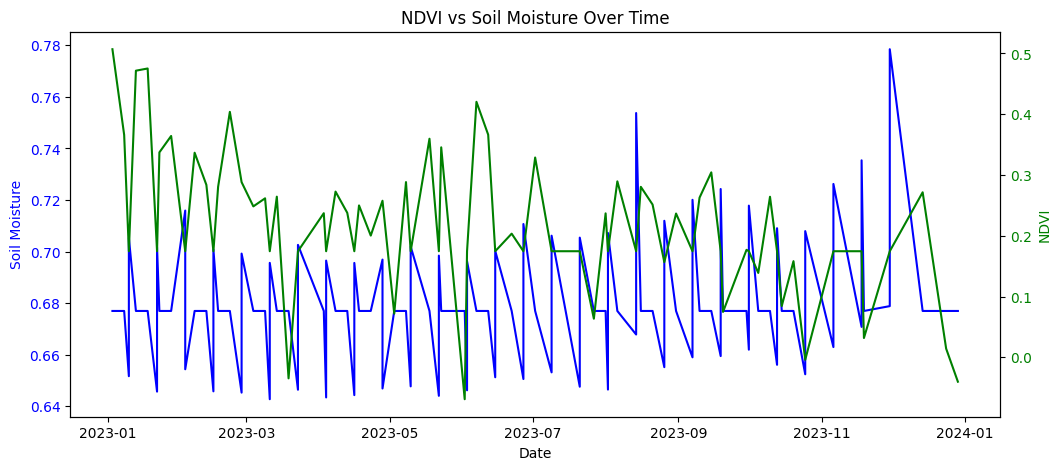

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/sentinel_merged.csv"
df = pd.read_csv(file_path)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by="Date")

# Plot NDVI and Soil Moisture
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Soil Moisture
ax1.plot(df['Date'], df['Soil_Moisture'], 'b-', label='Soil Moisture')
ax1.set_xlabel('Date')
ax1.set_ylabel('Soil Moisture', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot NDVI on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['NDVI'], 'g-', label='NDVI')
ax2.set_ylabel('NDVI', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("NDVI vs Soil Moisture Over Time")
plt.show()

In [ ]:
df.columns

Index(['Date', 'VV', 'VH', 'RVI', 'Soil_Moisture', 'Surface_Reflectance', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI', 'EVI',
       'SAVI'],
      dtype='object')

MODEL TRAINING

In [ ]:
# Install Required Libraries
!pip install torch norse pandas scikit-learn numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s et

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the fused dataset
file_path = "/content/sentinel_merged.csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop Non-Numeric Columns (e.g., Date)
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
df = df.drop(columns=non_numeric_cols)

In [ ]:
# Drop Rows with Missing Values
df = df.dropna()

In [ ]:
# Define Target Variables
target_columns = ["Soil_Moisture", "NDVI", "EVI", "SAVI"]
existing_targets = [col for col in target_columns if col in df.columns]

In [ ]:
# Ensure Data is Numeric
df = df.astype(np.float32)

In [ ]:
# Separate Features (X) and Targets (y)
X = df.drop(columns=existing_targets).values
y = df[existing_targets].values

In [ ]:
# Normalize Features and Targets
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [ ]:
# Convert Data to PyTorch Tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [ ]:
# Encoding Data into Spike Trains (Rate Coding)
def rate_encoding(data, time_steps=50):
    encoded_spikes = (torch.rand((data.shape[0], time_steps, data.shape[1])) < data.unsqueeze(1)).float()
    return encoded_spikes

X_train_spikes = rate_encoding(X_train)
X_test_spikes = rate_encoding(X_test)

In [ ]:
# Define Spiking Neural Network (SNN) Model
class SNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        batch_size, time_steps, _ = x.shape
        mem1 = norse.LIFState(v=torch.zeros(batch_size, 10).to(x.device),
                              i=torch.zeros(batch_size, 10).to(x.device),
                              z=torch.zeros(batch_size, 10).to(x.device))
        for t in range(time_steps):
            x_t = self.fc1(x[:, t, :])
            spiked, mem1 = self.lif1(x_t, mem1)
            x_t = self.fc2(spiked)
        return x_t

In [ ]:
# Initialize Model
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = y_train.shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SNNModel(input_dim, hidden_dim, output_dim).to(device)


In [ ]:
# Define Optimizer & Loss Function
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:235: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.11/dist-packages/torch/utils/_cxx_pytree.py:235: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


In [ ]:
# Train the Spiking Neural Network
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_spikes.to(device))
    loss = loss_fn(predictions, y_train.to(device))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation Loss Calculation
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_test_spikes.to(device))
        val_loss = loss_fn(val_predictions, y_test.to(device))
        val_losses.append(val_loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch}/{epochs}, Training Loss = {loss.item():.4f}, Validation Loss = {val_loss.item():.4f}")

Epoch 0/100, Training Loss = 1.0153, Validation Loss = 1.0875
Epoch 5/100, Training Loss = 0.9305, Validation Loss = 1.0568
Epoch 10/100, Training Loss = 0.9687, Validation Loss = 0.9582
Epoch 15/100, Training Loss = 0.9221, Validation Loss = 0.8946
Epoch 20/100, Training Loss = 0.8678, Validation Loss = 0.8835
Epoch 25/100, Training Loss = 0.8081, Validation Loss = 0.7594
Epoch 30/100, Training Loss = 0.8204, Validation Loss = 0.7040
Epoch 35/100, Training Loss = 0.7893, Validation Loss = 0.7557
Epoch 40/100, Training Loss = 0.7721, Validation Loss = 0.5913
Epoch 45/100, Training Loss = 0.7685, Validation Loss = 0.5645
Epoch 50/100, Training Loss = 0.7619, Validation Loss = 0.5606
Epoch 55/100, Training Loss = 0.7347, Validation Loss = 0.5597
Epoch 60/100, Training Loss = 0.7240, Validation Loss = 0.5348
Epoch 65/100, Training Loss = 0.7046, Validation Loss = 0.5387
Epoch 70/100, Training Loss = 0.7313, Validation Loss = 0.5804
Epoch 75/100, Training Loss = 0.7167, Validation Loss = 0

In [ ]:
# Save the trained model
model_path = "snn_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to snn_model.pth


In [ ]:
# Evaluate the Model on Test Data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_spikes.to(device))
    test_loss = loss_fn(test_predictions, y_test.to(device))
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.5542


In [ ]:
# Convert Predictions Back to Original Scale
test_predictions = scaler_y.inverse_transform(test_predictions.cpu().numpy())
df_predictions = pd.DataFrame(test_predictions, columns=existing_targets)

In [ ]:
# Calculate Additional Parameters
# Land Surface Temperature (LST) using B10 Band (if available)
if "B11" in df.columns and "B12" in df.columns:
    df_predictions["LST"] = 1.17 * df["B11"].mean() + 0.37 * df["B12"].mean() - 273.15


In [ ]:
# Crop Yield Forecasting (Simplified NDVI-Based Model)
df_predictions["Crop_Yield"] = df_predictions["NDVI"] * 10  # Placeholder formula


In [ ]:
# Drought Stress Analysis (NDVI & Soil Moisture based)
df_predictions["Drought_Stress"] = (1 - df_predictions["NDVI"]) * (1 - df_predictions["Soil_Moisture"])


In [ ]:
# Water Availability for Irrigation (Soil Moisture-based)
df_predictions["Water_Availability"] = df_predictions["Soil_Moisture"] * 100  # Placeholder formula

In [ ]:
# Flowering Time Estimation
# Assuming flowering time is influenced by NDVI and LST (higher values indicate early flowering)
if "LST" in df_predictions.columns:
    df_predictions["Flowering_Time"] = 100 - (df_predictions["NDVI"] * 50 + df_predictions["LST"] * 0.5)  # Placeholder formula

In [ ]:
# # Determine Crop Condition Based on Factors
# def evaluate_crop_condition(row):
#     if row["Soil_Moisture"] < 0.2 or row["NDVI"] < 0.3 or row["Water_Availability"] < 30 or row["Drought_Stress"] > 0.7 or row["LST"] > 35:
#         return "Bad for Crops"
#     elif 0.2 <= row["Soil_Moisture"] < 0.4 and 0.3 <= row["NDVI"] < 0.6:
#         return "Moderate Conditions"
#     else:
#         return "Good for Crops"

# df_predictions["Crop_Condition"] = df_predictions.apply(evaluate_crop_condition, axis=1)

In [ ]:
# Print Results
print("\nFinal Predictions Including Crop Condition Assessment:")
print(df_predictions.head())


Final Predictions Including Crop Condition Assessment:
   Soil_Moisture      NDVI       EVI      SAVI          LST  Crop_Yield  \
0       0.684019  0.233492  0.154357  0.343010  5223.650391    2.334922   
1       0.670159  0.237291  0.033294  0.354170  5223.650391    2.372907   
2       0.685618 -0.011466  0.023603 -0.019885  5223.650391   -0.114655   
3       0.672817  0.025679 -0.112822  0.018016  5223.650391    0.256792   
4       0.670159  0.237291  0.033294  0.354170  5223.650391    2.372907   

   Drought_Stress  Water_Availability  Flowering_Time  
0        0.242202           68.401871    -2523.499756  
1        0.251573           67.015892    -2523.689697  
2        0.317987           68.561798    -2511.251953  
3        0.318781           67.281685    -2513.109131  
4        0.251573           67.015892    -2523.689697  


EVALUATION METRICS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os

In [ ]:
# Calculate Model Evaluation Metrics
y_test_actual = scaler_y.inverse_transform(y_test.cpu().numpy())

mse = mean_squared_error(y_test_actual, test_predictions)
mae = mean_absolute_error(y_test_actual, test_predictions)
r2 = r2_score(y_test_actual, test_predictions)
rmse = np.sqrt(mse)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.2154
Mean Absolute Error (MAE): 0.2289
Root Mean Squared Error (RMSE): 0.4641
R² Score: -0.0132


In [ ]:
# Calculate accuracy within the defined tolerance range
tolerance = 0.30
absolute_errors = np.abs(y_test_actual - test_predictions)
within_tolerance = absolute_errors <= (tolerance * y_test_actual)
accuracy = np.mean(within_tolerance) * 100  # Convert to percentage
print(f"Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")

Accuracy (within 30.0% tolerance): 48.81%


In [ ]:
# Compute Pearson Correlation for Each Output Variable
for i, target in enumerate(existing_targets):
    correlation = np.corrcoef(y_test_actual[:, i], test_predictions[:, i])[0, 1]
    print(f"Pearson Correlation ({target}): {correlation:.4f}")

Pearson Correlation (Soil_Moisture): 0.5007
Pearson Correlation (NDVI): 0.7326
Pearson Correlation (EVI): 0.0065
Pearson Correlation (SAVI): 0.7373


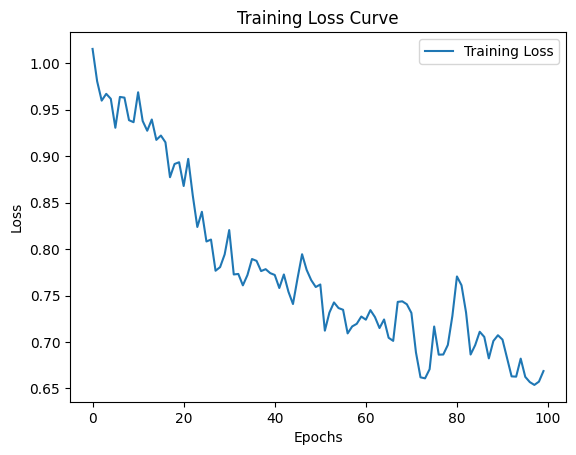

In [ ]:
# Plot Training Loss
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

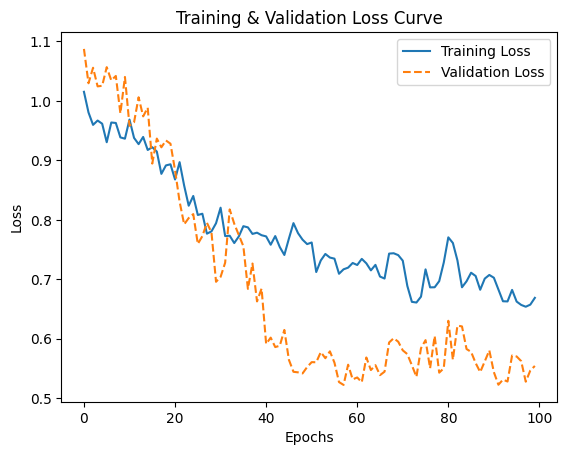

In [ ]:
# Plot Training & Validation Loss Curves
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss", linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted Soil Moisture')

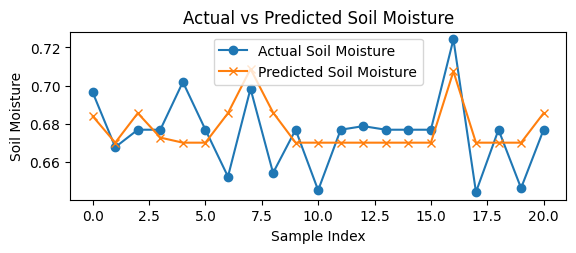

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(y_test_actual[:, 0], label="Actual Soil Moisture", marker="o")
plt.plot(test_predictions[:, 0], label="Predicted Soil Moisture", marker="x")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")

Text(0.5, 1.0, 'Actual vs Predicted NDVI')

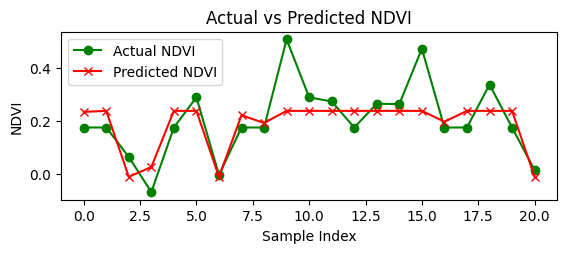

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(y_test_actual[:, 1], label="Actual NDVI", marker="o", color="green")
plt.plot(test_predictions[:, 1], label="Predicted NDVI", marker="x", color="red")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("NDVI")
plt.title("Actual vs Predicted NDVI")